___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [21]:
!pip install yfinance

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [23]:
BAC = yf.download('BAC', start="2006-01-01", end="2016-01-01")
C = yf.download('C', start="2006-01-01", end="2016-01-01")
GS = yf.download('GS', start="2006-01-01", end="2016-01-01")
JPM = yf.download('JPM', start="2006-01-01", end="2016-01-01")
MS = yf.download('MS', start="2006-01-01", end="2016-01-01")
WFC = yf.download('WFC', start="2006-01-01", end="2016-01-01")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [24]:
BAC

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,32.425449,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,32.081074,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,32.122395,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,32.074184,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,32.094852,15619400
...,...,...,...,...,...,...
2015-12-24,17.320000,17.379999,17.219999,17.270000,14.669742,29369400
2015-12-28,17.219999,17.230000,16.980000,17.129999,14.550817,41777500
2015-12-29,17.250000,17.350000,17.160000,17.280001,14.678232,45670400


In [25]:
C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,490.000000,493.799988,481.100006,492.899994,338.403259,1537600
2006-01-04,488.600006,491.000000,483.500000,483.799988,332.155609,1870960
2006-01-05,484.399994,487.799988,484.000000,486.200012,333.803314,1143160
2006-01-06,488.799988,489.000000,482.000000,486.200012,333.803314,1370210
2006-01-09,486.000000,487.399994,483.000000,483.899994,332.224304,1680740
...,...,...,...,...,...,...
2015-12-24,52.480000,52.970001,52.450001,52.709999,41.972157,4671200
2015-12-28,52.570000,52.570000,51.959999,52.380001,41.709389,8761700
2015-12-29,52.759998,53.220001,52.740002,52.980000,42.187153,10155100


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [26]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [27]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers, axis=1)
bank_stocks

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.425449  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.081074  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.122395  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.074184  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.094852  15619400   
...               ...        ...        ...        ...        ...       ...   
2015-12-24  17.320000  17.379999  17.219999  17.270000  14.669742  29369400   
2015-12-28  17.219999  17.230000  16.980000  17.129999  14.550817  41777500   
2015-12-29  17.250000  17.350000  17.160000  17.280001  14.678232  45670400   
2015-12-30  17.200001  17.240000  17.040001  17.049999  14.482863  35066400   
2015-12-31  17.010000  17.070000  16.830000  16.830000  14.295989  47153000   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28   52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29   52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30   52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31   52.070000   52.389999   51.750000   51.750000  ...  31.770000   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  33.585461  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  33.608498  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  33.700642  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  33.735203  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.092323  4144500  31.674999  31.825001  31.555000   
...               ...        ...      ...        ...        ...        ...   
2015-12-24  32.480000  26.070406  2798200  54.970001  55.090000  54.709999   
2015-12-28  32.169998  25.821583  5420300  54.549999  54.779999  54.169998   
2015-12-29  32.549999  26.126593  6388200  55.110001  55.349998  54.990002   
2015-12-30  32.230000  25.869741  5057200  55.270000  55.310001  54.790001   
2015-12-31  31.809999  25.532629  8154300  54.509998  54.950001  54.220001   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.369587  11016400  
2006-01-04  31.530001  19.144934  10870000  
2006-01-05  31.495001  19.123678  10158000  
2006-01-06  31.680000  19.236010   8403800  
2006-01-09  31.674999  19.232969   5619600  
...               ...        ...       ...  
2015-12-24  54.820000  43.350594   4999400  
2015-12-28  54.680000  43.239887   8288800  
2015-12-29  55.290001  43.722263   7894900  
2015-12-30  54.889999  43.405952   8016900  
2015-12-31  54.360001  42.986847  10929800  

[2517 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [28]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [29]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425449  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081074  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122395  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074184  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094852  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.585461  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.608498  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.700642  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.735203  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.092323  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.369587  11016400  
2006-01-04   31.530001  19.144934  10870000  
2006-01-05   31.495001  19.123678  10158000  
2006-01-06   31.680000  19.236010   8403800  
2006-01-09   31.674999  19.232969   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [30]:
bank_stocks['BAC']['Close'].max()

54.900001525878906

In [31]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
WFC 58.52000045776367


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [32]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [33]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
for bank in tickers:
    returns[bank + ' Returns'] = bank_stocks[bank]['Close'].pct_change()
returns

#returns[bank + ' Returns'] = : 這部分程式碼將上述計算的百分比變化賦值給新的returns資料框的一個新列。
#這個列的名稱將會是銀行代號加上一個字符串' Returns'。例如，如果當前的bank是'BAC'，新的列的名稱將會是'BAC Returns'。

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

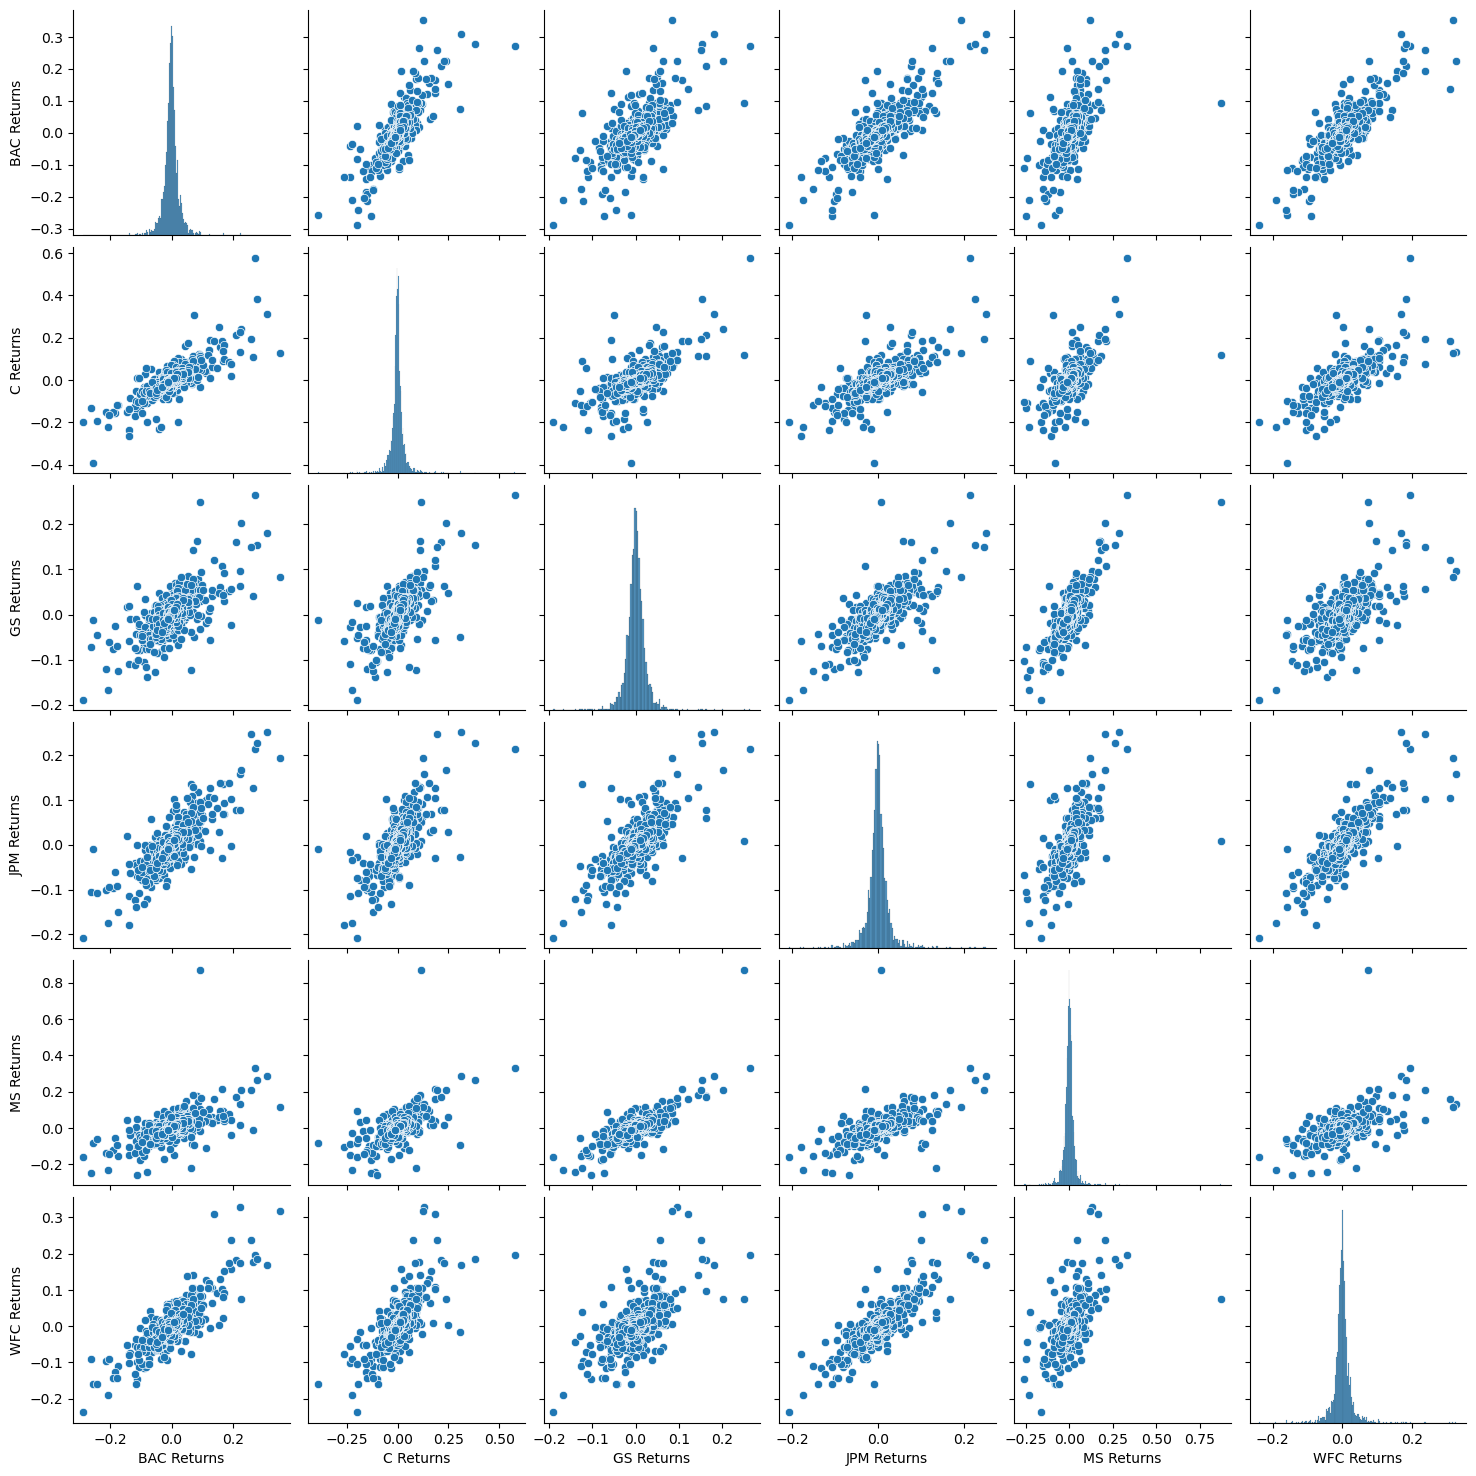

In [34]:
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [35]:
returns['BAC Returns'].idxmax()

Timestamp('2009-04-09 00:00:00')

In [36]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [37]:
returns['BAC Returns'].idxmin()

Timestamp('2009-01-20 00:00:00')

In [38]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [39]:
for bank in returns:
    print(bank, 'std', returns[bank].std())

BAC Returns std 0.036647428911353884
C Returns std 0.03867175165181401
GS Returns std 0.0253897637710445
JPM Returns std 0.02766738425898574
MS Returns std 0.03781922911717962
WFC Returns std 0.03023753835745813


In [40]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [41]:
returns.reset_index(inplace=True)
returns

,Date,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...,...
2512,2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2513,2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2514,2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2515,2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


In [42]:
returns['Date'][0].year 

2006

In [43]:
returns['Year'] = returns['Date'].apply(lambda time: time.year) 
returns

,Date,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns,Year
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110,2006
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874,2006
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158,2006
...,...,...,...,...,...,...,...,...
2512,2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997,2015
2513,2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554,2015
2514,2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156,2015
2515,2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235,2015


In [44]:
returns2015 = returns[returns['Year']==2015]

bank_returns = ['BAC Returns','C Returns','GS Returns','JPM Returns','MS Returns','WFC Returns']
for bank in bank_returns:
    print(bank,'std:', returns2015[bank].std())

BAC Returns std: 0.016162568742018803
C Returns std: 0.015289387324415937
GS Returns std: 0.01404639855698666
JPM Returns std: 0.014016841928251957
MS Returns std: 0.016249117170001694
WFC Returns std: 0.012591404257112995


In [45]:
#Which would you classify as the riskiest for the year 2015
#MS Returns

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Tiffany\AppData\Local\Temp\ipykernel_39492\1403727295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns2015['MS Returns'], bins=120,color='green')


<Axes: xlabel='MS Returns', ylabel='Density'>

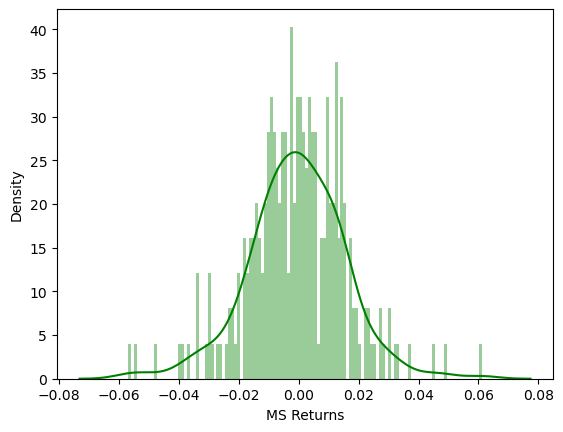

In [46]:
sns.distplot(returns2015['MS Returns'], bins=120,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

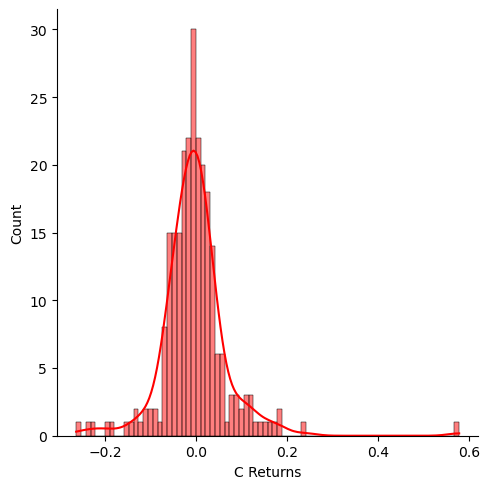

In [47]:
returns2008 = returns[returns['Year']==2008]
sns.displot(returns2008['C Returns'],bins=80,color='red',alpha=0.5,kde=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [49]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

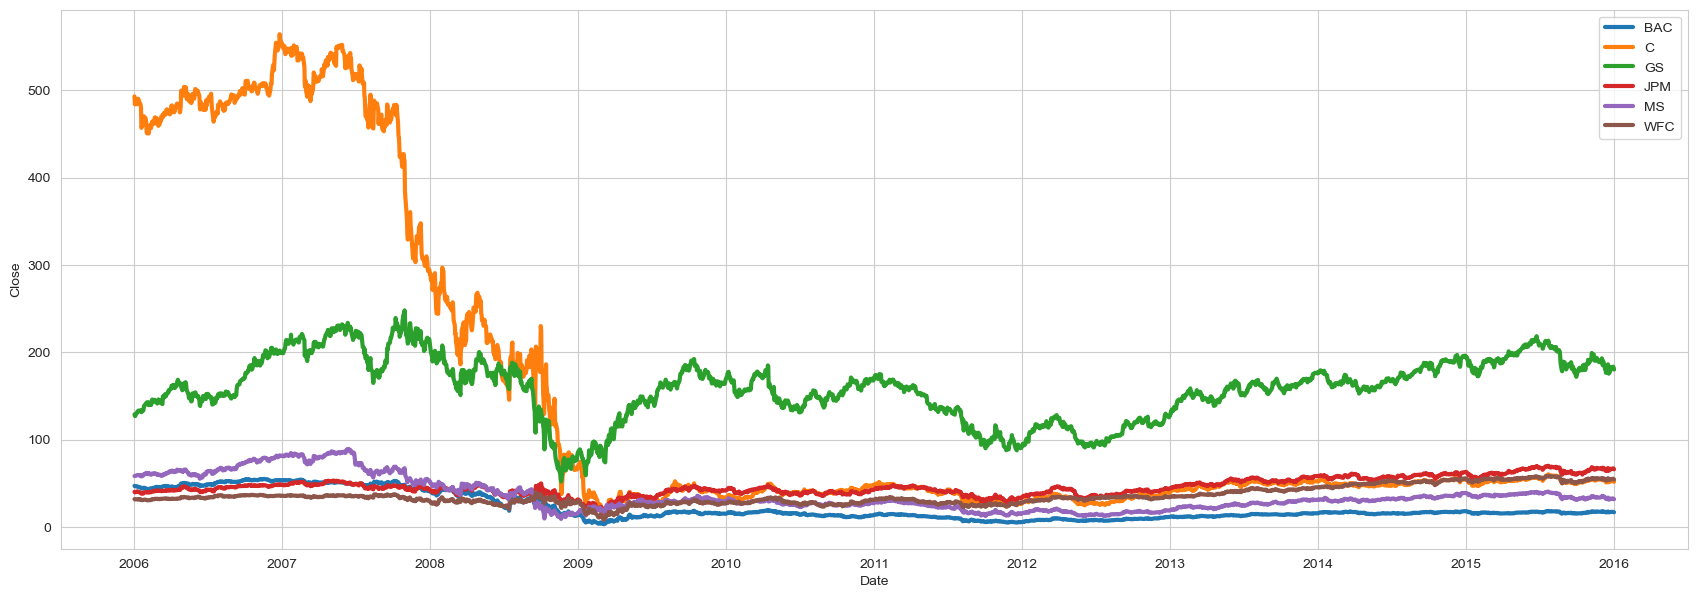

In [50]:
plt.figure(figsize=(21,7))

for bank in tickers:
    sns.lineplot(bank_stocks[bank]['Close'], label=bank, lw=3)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [51]:
BAC.reset_index(inplace=True)
BAC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-03,46.919998,47.180000,46.150002,47.080002,32.425449,16296700
1,2006-01-04,47.000000,47.240002,46.450001,46.580002,32.081074,17757900
2,2006-01-05,46.580002,46.830002,46.320000,46.639999,32.122395,14970700
3,2006-01-06,46.799999,46.910000,46.349998,46.570000,32.074184,12599800
4,2006-01-09,46.720001,46.970001,46.360001,46.599998,32.094852,15619400
...,...,...,...,...,...,...,...
2512,2015-12-24,17.320000,17.379999,17.219999,17.270000,14.669742,29369400
2513,2015-12-28,17.219999,17.230000,16.980000,17.129999,14.550817,41777500
2514,2015-12-29,17.250000,17.350000,17.160000,17.280001,14.678232,45670400
2515,2015-12-30,17.200001,17.240000,17.040001,17.049999,14.482863,35066400


In [52]:
BAC['Year']=BAC['Date'].apply(lambda time: time.year)
BAC_2008 = BAC[BAC['Year'] == 2008]
BAC_2008['30 Day Avg'] = BAC_2008['Close'].rolling(window=30).mean()

<Axes: xlabel='Date', ylabel='Close'>

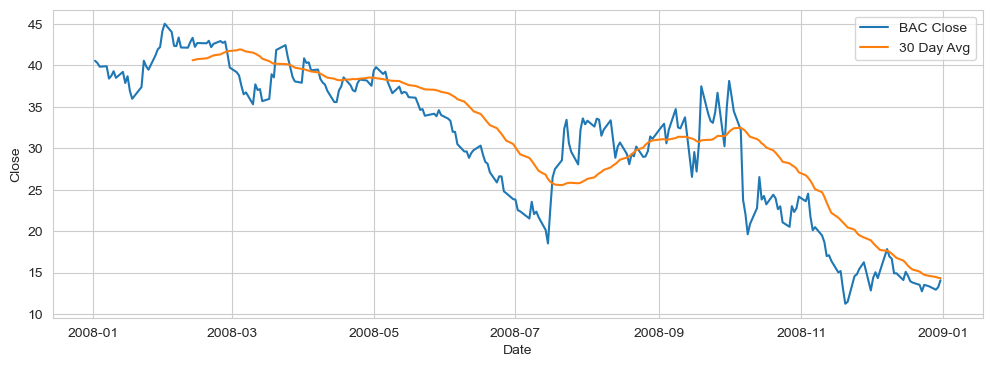

In [53]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Date', y='Close', data=BAC_2008, label='BAC Close')
sns.lineplot(x='Date', y='30 Day Avg', data=BAC_2008, label='30 Day Avg')

** Create a heatmap of the correlation between the stocks Close Price.**

In [54]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

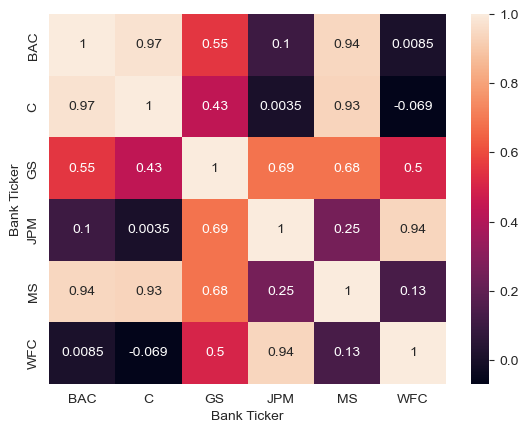

In [55]:
#Correlation between the closing prices of the stocks
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

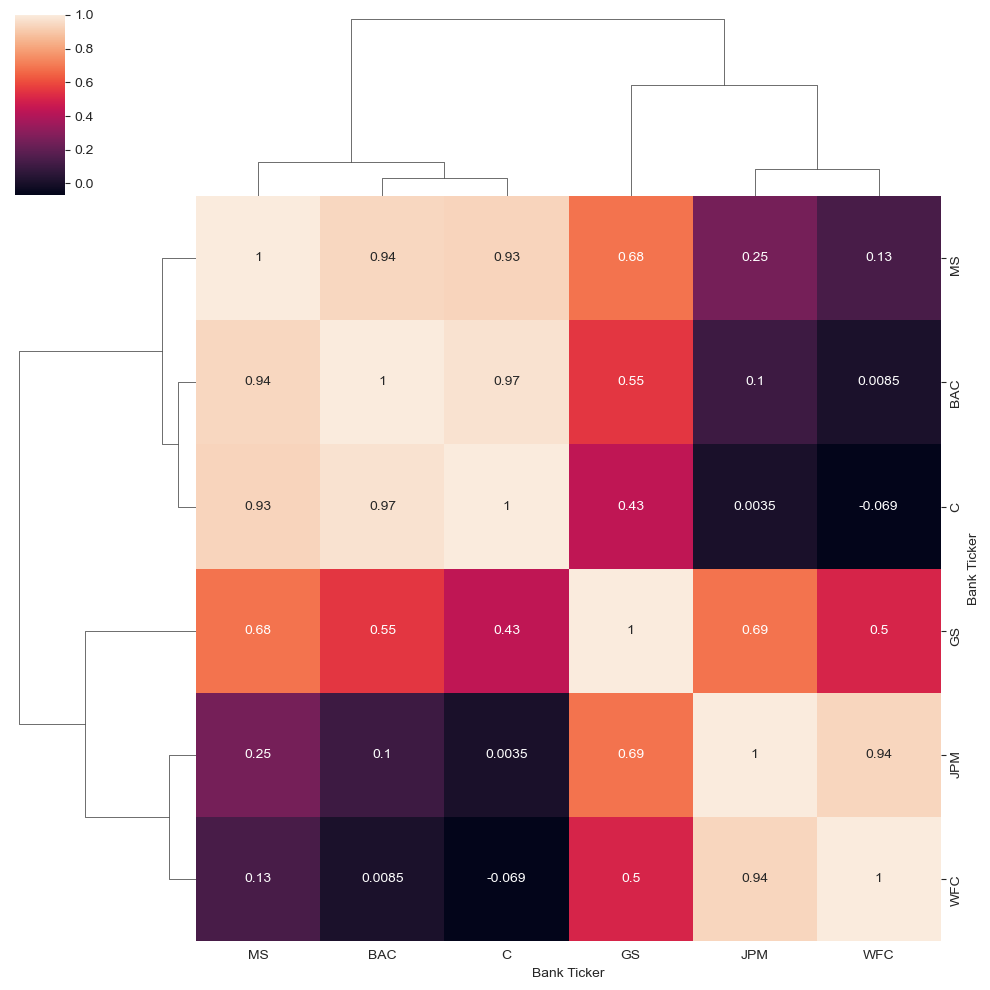

In [56]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

In [57]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

In [58]:
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [59]:
bac15 = BAC.loc['2015-01-01':'2016-01-01',['Open','High','Low','Close']]
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [60]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [61]:
BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll') 

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.